# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]
        city_lng =  city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"] 
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | voloshka
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | kudahuvadhoo
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | iracoubo
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | cherskiy
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | naberera
Processing Record 16 of Set 1 | sedelnikovo
City not found. Skipping...
Processing Record 17 of Set 1 | okhotsk
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | tunceli
Processing Record 20 of Set 1 | faanui
Processing Record 21 of Set 1 | hasaki
Processing Record 22 of Set 1 | dikson
Processing Record 23

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,25.67,77,80,2.33,PF,1680271065
1,provideniya,64.3833,-173.3000,-16.58,87,10,3.12,RU,1680271065
2,khatanga,71.9667,102.5000,-20.74,93,98,6.41,RU,1680271065
3,voloshka,61.3314,40.0858,1.10,76,43,1.01,RU,1680271065
4,ushuaia,-54.8000,-68.3000,5.81,81,20,2.06,AR,1680271065


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,25.67,77,80,2.33,PF,1680271065
1,provideniya,64.3833,-173.3000,-16.58,87,10,3.12,RU,1680271065
2,khatanga,71.9667,102.5000,-20.74,93,98,6.41,RU,1680271065
3,voloshka,61.3314,40.0858,1.10,76,43,1.01,RU,1680271065
4,ushuaia,-54.8000,-68.3000,5.81,81,20,2.06,AR,1680271065


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

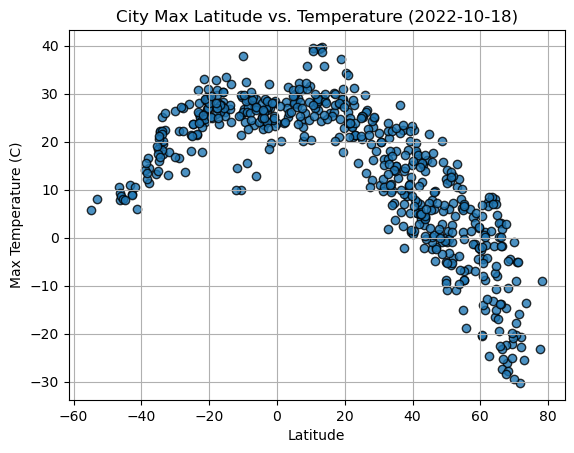

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

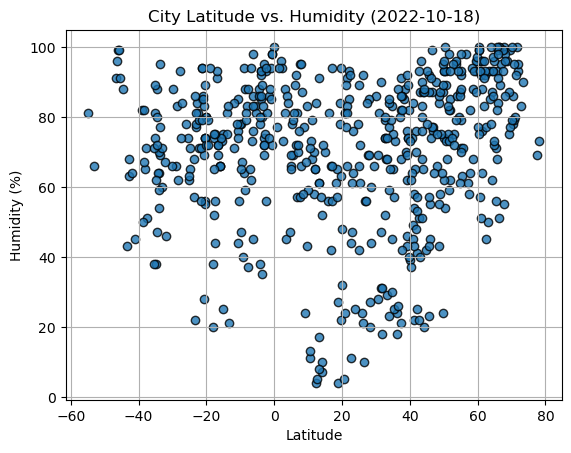

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

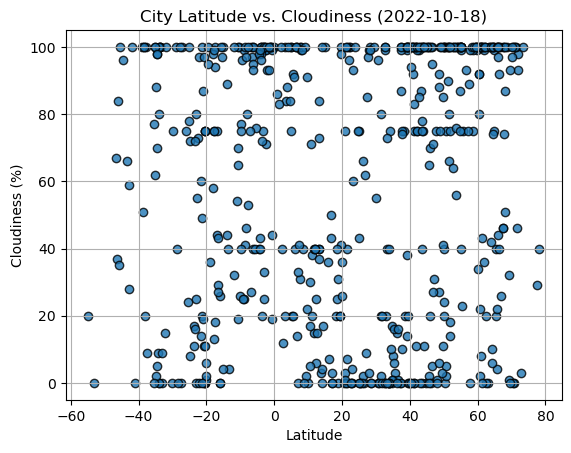

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

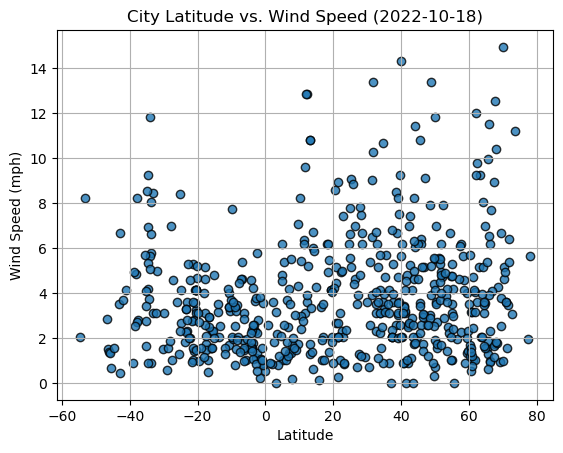

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept

    #get the r-value
    r_value = r_value**2
    print("The r-value is: " + str(r_value))
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,provideniya,64.3833,-173.3000,-16.58,87,10,3.12,RU,1680271065
2,khatanga,71.9667,102.5000,-20.74,93,98,6.41,RU,1680271065
3,voloshka,61.3314,40.0858,1.10,76,43,1.01,RU,1680271065
5,upernavik,72.7868,-56.1549,-25.51,83,3,3.06,GL,1680271065
6,clyde river,70.4692,-68.5914,-17.87,78,100,5.14,CA,1680271065


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,25.67,77,80,2.33,PF,1680271065
4,ushuaia,-54.8000,-68.3000,5.81,81,20,2.06,AR,1680271065
8,cape town,-33.9258,18.4232,25.06,64,0,11.83,ZA,1680271028
9,east london,-33.0153,27.9116,22.52,60,0,3.09,ZA,1680270867
11,hermanus,-34.4187,19.2345,22.11,64,9,3.74,ZA,1680271065


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7617606145415416


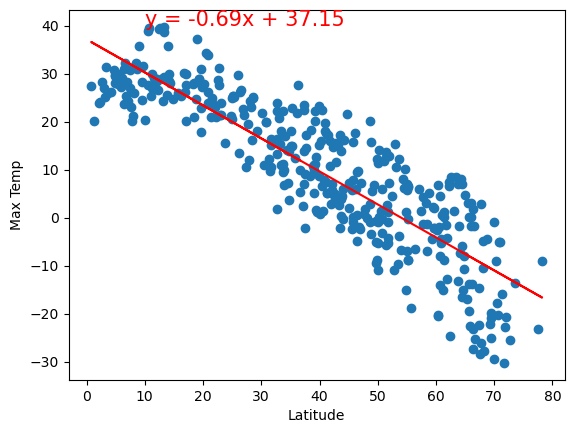

In [16]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 'Max Temp', (10,40))

The r-value is: 0.428045182543655


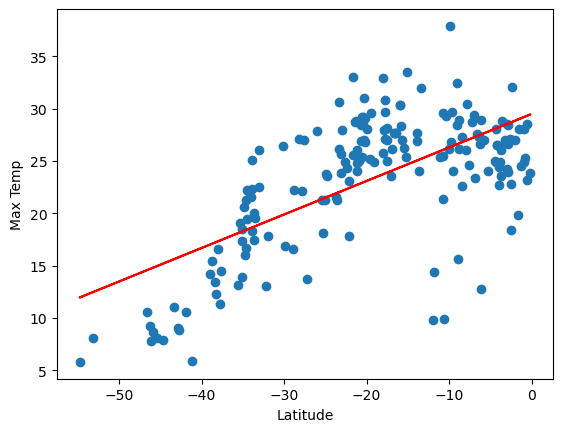

In [25]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 'Max Temp', (-50,90))


**Discussion about the linear relationship:** The linear regression model y = -0.69x + 37.15 for the Northern Hemisphere is modeling the relationship between temperature and latitude in the Northern Hemisphere. The negative coefficient for the latitude variable (x) indicates that as latitude increases (moving further away from the equator towards the North Pole), the predicted temperature (y) decreases. The positive intercept term (37.15) represents the predicted temperature at the equator (latitude = 0) for the Northern Hemisphere.

In contrast, the linear regression for the Southern Hemisphere has a positive correlation, which indicates that as latitude increases (moving further away from the equator towards the South Pole), the predicted temperature also increases. This is because the Southern Hemisphere is south of the equator, so higher latitudes are actually closer to the equator than lower latitudes.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12709775437525367


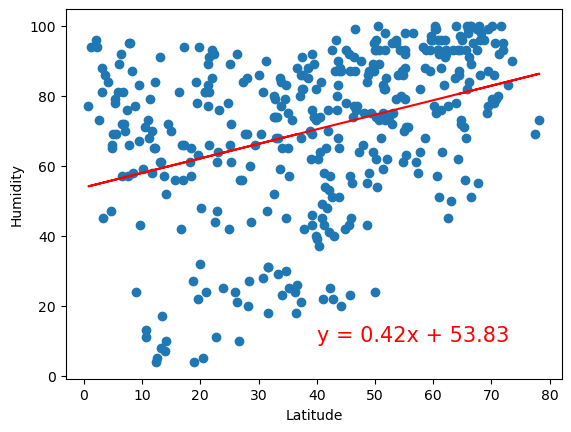

In [18]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, 'Humidity', (40,10))

The r-value is: 0.01742123429980089


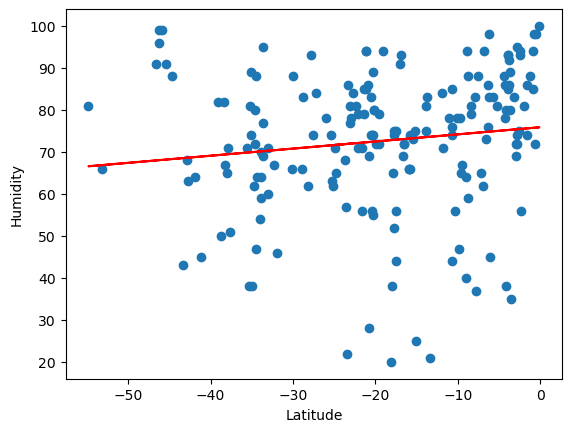

In [19]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, 'Humidity', (-50,15))

**Discussion about the linear relationship:** The linear regression model y = 0.42x + 53.83 for the Northern Hemisphere is modeling the relationship between humidity and latitude in the Northern Hemisphere. The positive coefficient for the latitude variable (x) indicates that as latitude increases (moving further away from the equator towards the North Pole), the predicted humidity (y) also increases. The positive intercept term (53.83) represents the predicted humidity at the equator (latitude = 0) for the Northern Hemisphere.

In contrast, the linear regression for the Southern Hemisphere has a slight positive correlation, which indicates that as latitude increases (moving further away from the equator towards the South Pole), the predicted humidity also slightly increases. This suggests that there may be a weak relationship between humidity and latitude in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04973334653886886


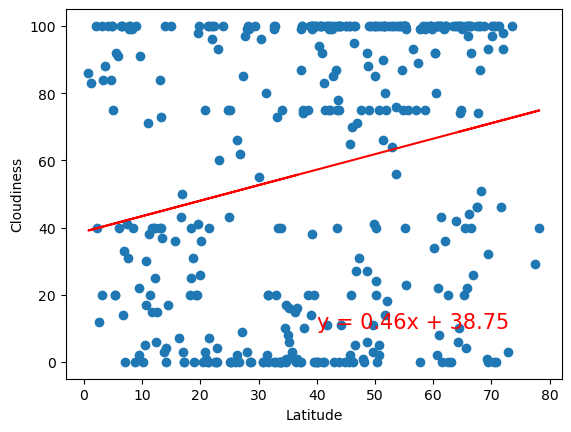

In [20]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-value is: 0.04549613101541257


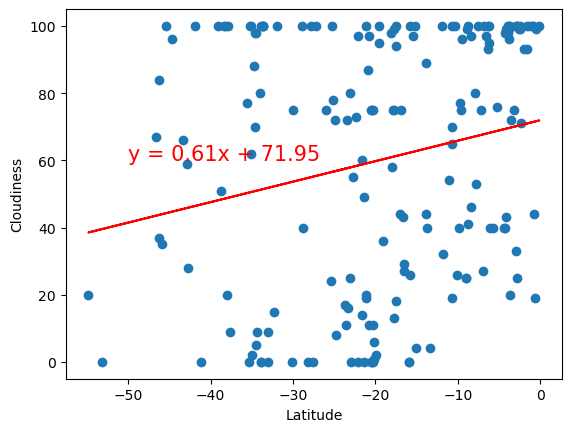

In [21]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 'Cloudiness', (-50,60))

**Discussion about the linear relationship:** The linear regression model y = 0.46x + 38.75 for the Northern Hemisphere is modeling the relationship between cloudiness and latitude in the Northern Hemisphere. The positive coefficient for the latitude variable (x) indicates that as latitude increases (moving further away from the equator towards the North Pole), the predicted cloudiness (y) also increases. The positive intercept term (38.75) represents the predicted cloudiness at the equator (latitude = 0) for the Northern Hemisphere.

In contrast, the linear regression model y = 0.61x + 71.95 for the Southern Hemisphere is modeling the relationship between cloudiness and latitude in the Southern Hemisphere. The positive coefficient for the latitude variable (x) indicates that as latitude increases (moving further away from the equator towards the South Pole), the predicted cloudiness (y) also increases. The positive intercept term (71.95) represents the predicted cloudiness at the equator (latitude = 0) for the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0042258521074768525


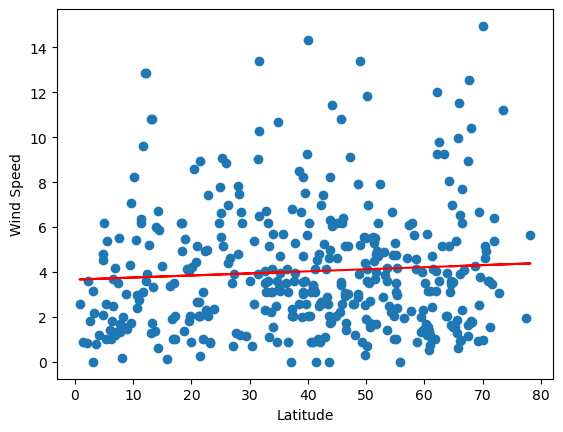

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 'Wind Speed', (40,35))

The r-value is: 0.0986564133605685


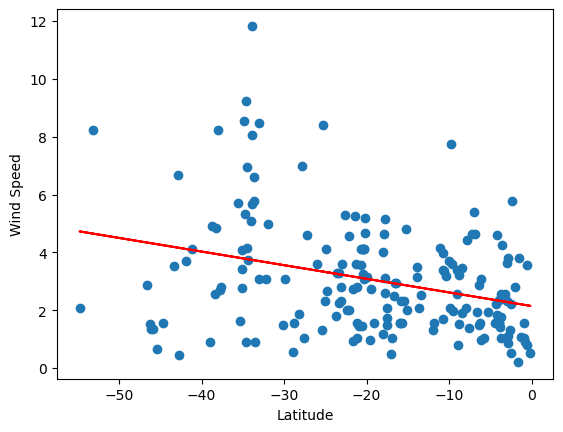

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 'Wind Speed', (-50,35))

**Discussion about the linear relationship:** The linear regression model for the Northern Hemisphere for Wind Speed vs. Latitude has a slight positive correlation. This means that as latitude increases (moving further away from the equator towards the North Pole), the predicted wind speed also slightly increases. However, the slope of the line is small, which indicates that the relationship between wind speed and latitude is weak in the Northern Hemisphere.

In contrast, the linear regression model for the Southern Hemisphere for Wind Speed vs. Latitude has a negative correlation. This means that as latitude increases (moving further away from the equator towards the South Pole), the predicted wind speed decreases. The negative slope of the line indicates that the relationship between wind speed and latitude is stronger in the Southern Hemisphere than in the Northern Hemisphere.